In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [ ]:
print(data.shape)

(1453, 15)


In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data["yummy"]= data["yummy"].replace({'Yes':1, 'No':0})
data["convenient"] = data["convenient"].replace({'Yes':1, 'No':0})
data["spicy"] = data["spicy"].replace({'Yes':1, 'No':0})
data["fattening"] = data["fattening"].replace({'Yes':1, 'No':0})
data["greasy"] = data["greasy"].replace({'Yes':1, 'No':0})
data["fast"] = data["fast"].replace({'Yes':1, 'No':0})
data["cheap"] = data["cheap"].replace({'Yes':1, 'No':0})
data["tasty"] = data["tasty"].replace({'Yes':1, 'No':0})
data["expensive"] = data["expensive"].replace({'Yes':1, 'No':0})
data["healthy"] = data["healthy"].replace({'Yes':1, 'No':0})
data["disgusting"] = data["disgusting"].replace({'Yes':1, 'No':0})

data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [ ]:
data1= data.iloc[:,0:11]
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
scale = scalar.fit_transform(data1)
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scale)
newpca = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
newpca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<Axes: xlabel='PCA1', ylabel='PCA2'>

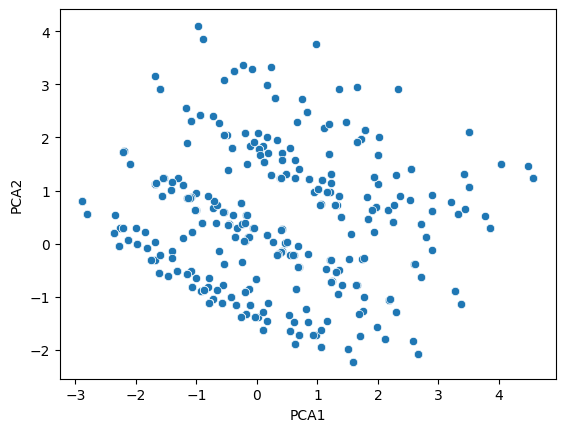

In [ ]:
sns.scatterplot(data=newpca, x="PCA1", y="PCA2")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

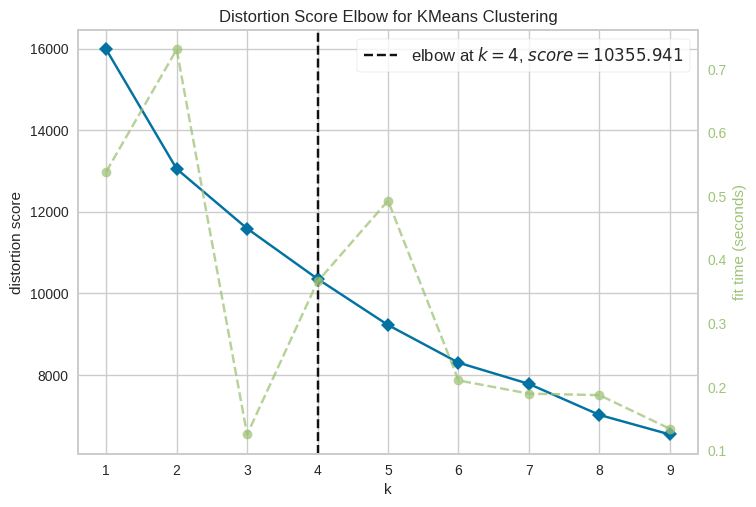

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scale)
visualizer.show()

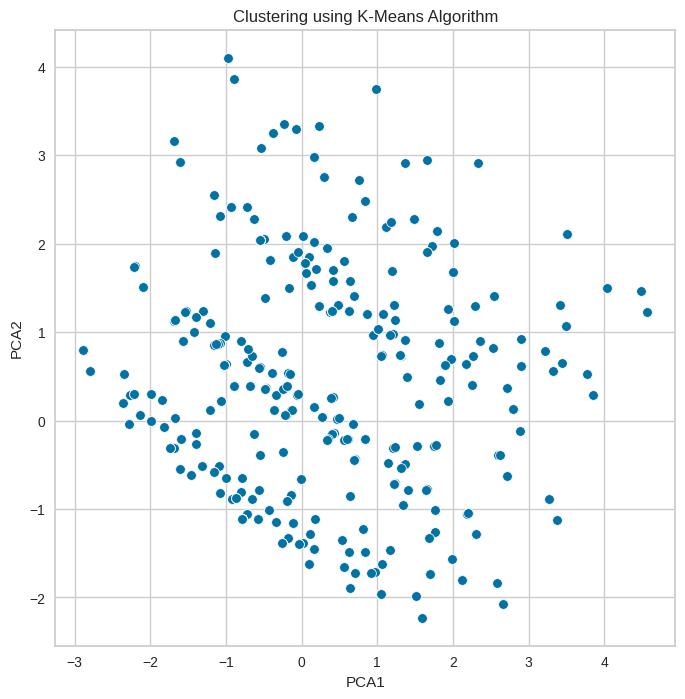

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",data=newpca)
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scale)
kmeanspca= pd.concat([data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
kmeanspca.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,3
4,0,1,0,1,1,1,1,0,0,1,0,3


<Axes: xlabel='cluster', ylabel='count'>

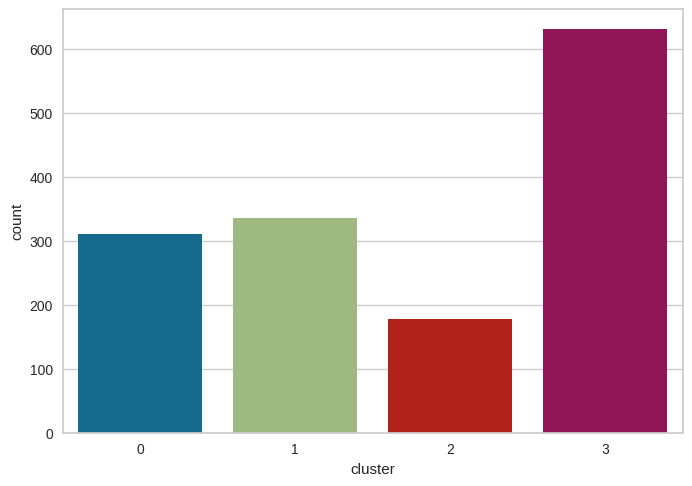

In [ ]:
sns.countplot(x ='cluster', data =kmeanspca)

In [ ]:
cluster1 = kmeanspca[kmeanspca["cluster"]==0]
cluster1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,0
10,0,1,0,1,0,1,1,0,0,0,1,0
18,0,0,0,1,1,1,1,0,1,0,1,0
33,0,1,0,1,1,1,1,0,0,0,1,0
35,0,1,0,1,1,1,1,0,0,0,1,0


<ipython-input-20-9f55bf56177b>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




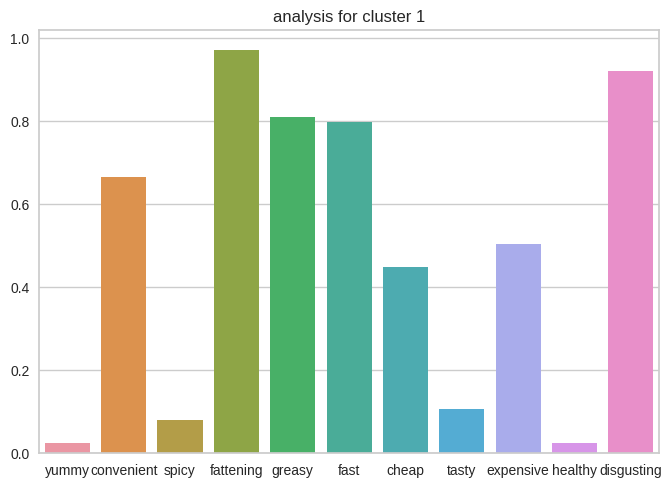

<ipython-input-20-9f55bf56177b>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




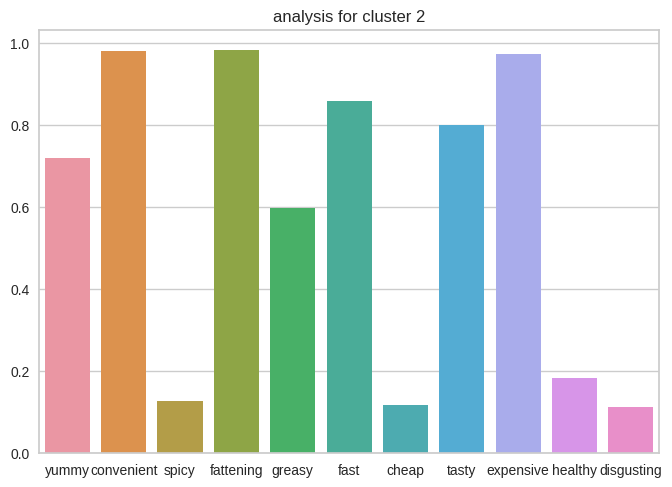

<ipython-input-20-9f55bf56177b>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




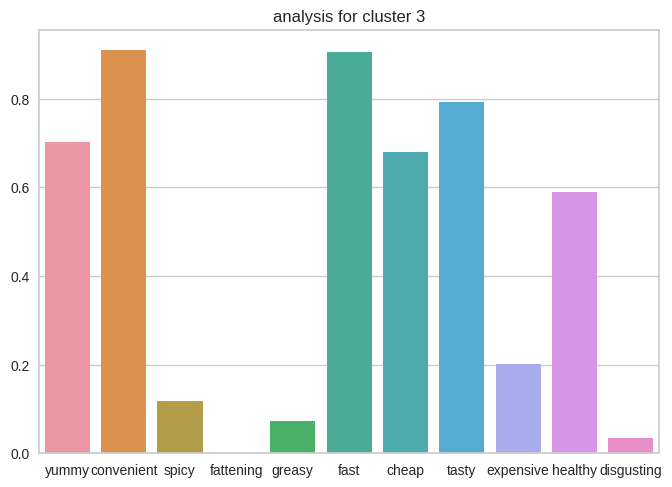

<ipython-input-20-9f55bf56177b>:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




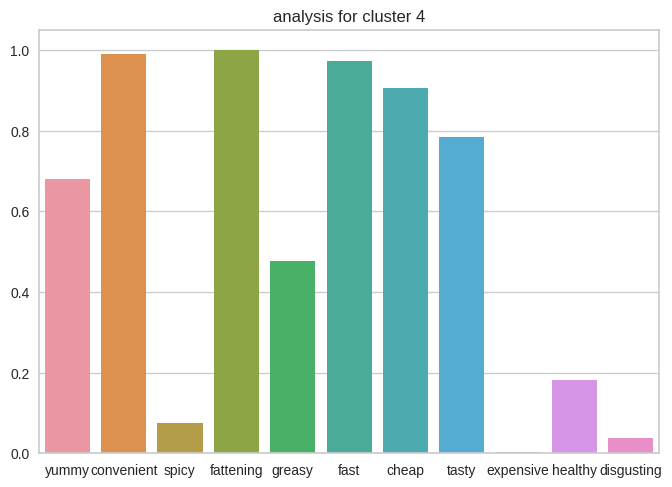

In [ ]:
ax = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

cluster_2_df = kmeanspca[kmeanspca["cluster"]==1]
cluster_2_df.head()
ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

cluster_3_df = kmeanspca[kmeanspca["cluster"]==2]
cluster_3_df.head()
ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()

cluster_4_df = kmeanspca[kmeanspca["cluster"]==3]
cluster_4_df.head()
ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

In [ ]:
changed_data= pd.concat([data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
changed_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [ ]:
changed_data['VisitFrequency'].value_counts()
changed_data["VisitFrequency"]= changed_data["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4,'More than once a week':5})
changed_data["Like"]= changed_data["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8,'+4':9,'I love it!+5':10})
changed_data["Gender"]= changed_data["Gender"].replace({'Female':0, 'Male':1})
changed_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,3
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,3
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


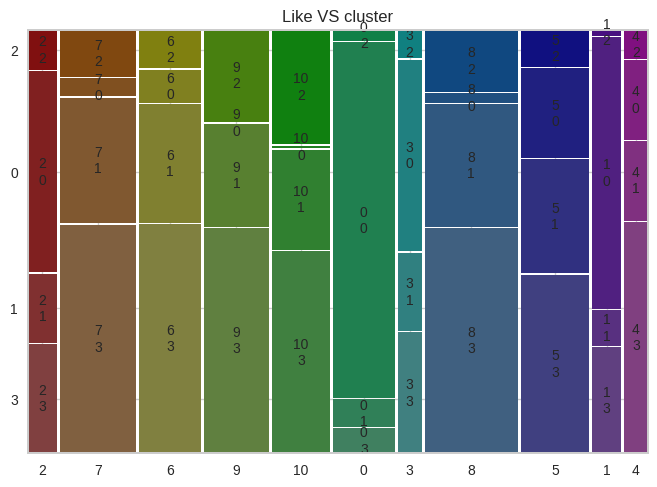

In [ ]:
mosaic(changed_data, ['Like','cluster'],title='Like VS cluster')
plt.show()

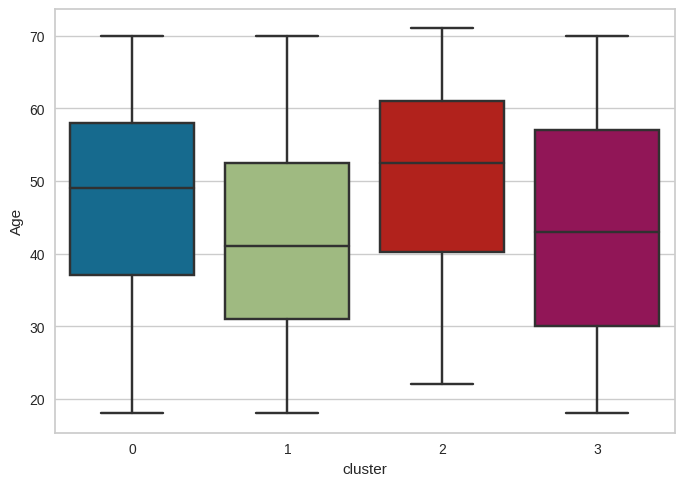

In [ ]:
sns.boxplot(x=changed_data['cluster'], y=changed_data['Age'])
plt.show()

In [ ]:
X = changed_data.drop(['cluster'],axis=1)
y= changed_data[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 74   5   3   5]
 [  5 103   1   0]
 [  1   1  47   0]
 [  0   1   0 190]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        87
           1       0.94      0.94      0.94       109
           2       0.92      0.96      0.94        49
           3       0.97      0.99      0.98       191

    accuracy                           0.95       436
   macro avg       0.94      0.94      0.94       436
weighted avg       0.95      0.95      0.95       436

